# Experiment - 1: Eye Detection

In [ ]:
!pip install opencv-python

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
image_path_1 = "/content/image.jpg"

In [ ]:
image_path_2 = "/content/image2.jpg"

In [ ]:
img_1 = cv2.imread(image_path_1)

In [ ]:
img_2 = cv2.imread(image_path_2)

In [ ]:
if img_1 is None:
    print("Error: Could not read the image. Please check the path.")
else:
    gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(img_1, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img_1[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    cv2_imshow(img_1)

Error: Could not read the image. Please check the path.


In [ ]:
if img_2 is None:
    print("Error: Could not read the image. Please check the path.")
else:
    gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(img_2, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img_2[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    cv2_imshow(img_2)

Error: Could not read the image. Please check the path.


# Experiment - 2 - Playing with Images

## Image Filters and Effects, Image Resizing and Cropping Tool, Color Picker and Extractor, Face Mask Filter

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
image_path = "/content/sample.png"

In [ ]:
img = cv2.imread(image_path)

### GrayScale

In [ ]:
def apply_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Sepia Effect

In [ ]:
def apply_sepia(image):
    kernel = np.array([[0.393, 0.769, 0.189],
                       [0.349, 0.686, 0.168],
                       [0.272, 0.534, 0.131]])
    return cv2.transform(image, kernel)

### Negative Effect

In [ ]:
def apply_negative(image):
    return cv2.bitwise_not(image)

### Blur Effect

In [ ]:
def apply_blur(image, ksize=(5, 5)):
    return cv2.GaussianBlur(image, ksize, 0)

### Edge Detection

In [ ]:
def apply_edge_detection(image):
    return cv2.Canny(image, 100, 200)

### Cartoonify Image

In [ ]:
def apply_cartoonify(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    color = cv2.bilateralFilter(image, 9, 300, 300)
    return cv2.bitwise_and(color, color, mask=edges)

### Resizing

In [ ]:
def resize_image(image, width=500):
    aspect_ratio = width / float(image.shape[1])
    height = int(image.shape[0] * aspect_ratio)
    return cv2.resize(image, (width, height))

### Cropping

In [ ]:
def crop_image(image):
    height, width = image.shape[:2]
    size = min(height, width)
    center_x, center_y = width // 2, height // 2
    cropped = image[center_y - size // 2:center_y + size // 2, center_x - size // 2:center_x + size // 2]
    return cropped

### Rotation

In [ ]:
def rotate_image(image, angle=45):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated = cv2.warpAffine(image, matrix, (width, height))
    return rotated

### Driver Codes

In [ ]:
grayscale_img = apply_grayscale(img)
sepia_img = apply_sepia(img)
negative_img = apply_negative(img)
blur_img = apply_blur(img)
edges_img = apply_edge_detection(img)
cartoon_img = apply_cartoonify(img)
resized_img = resize_image(img)
cropped_img = crop_image(img)
rotated_img = rotate_image(img)

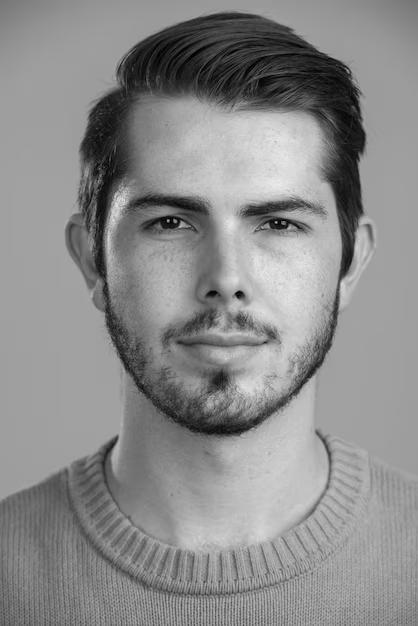

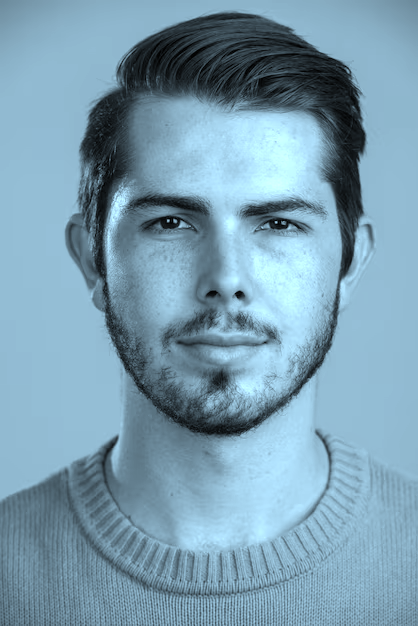

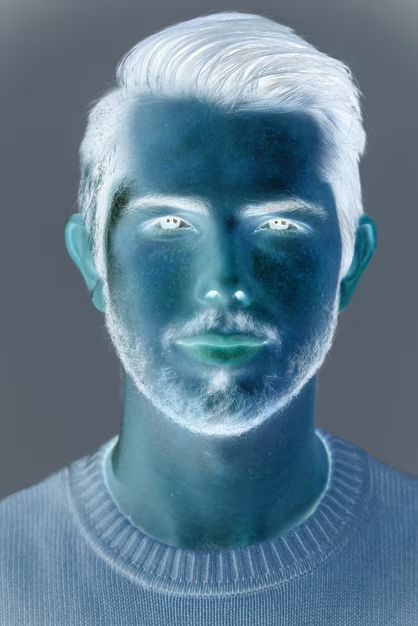

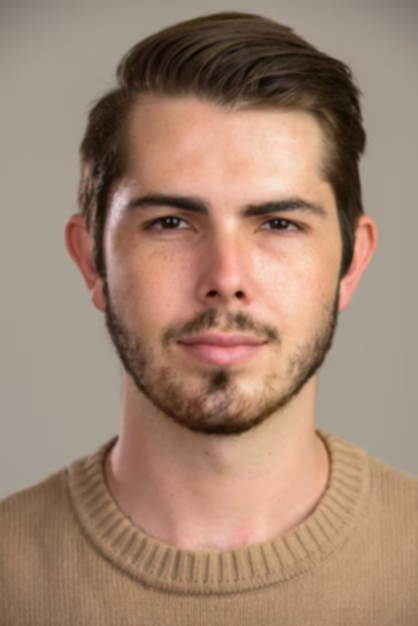

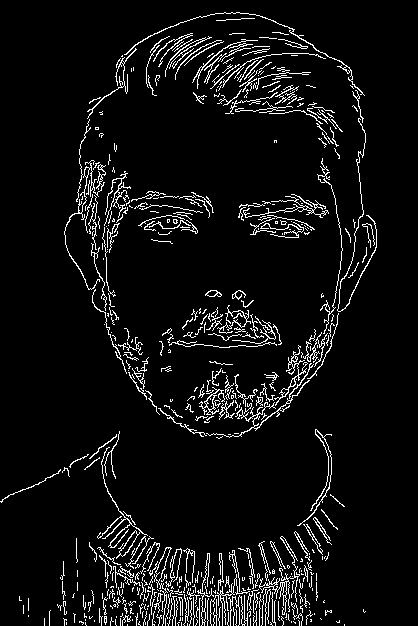

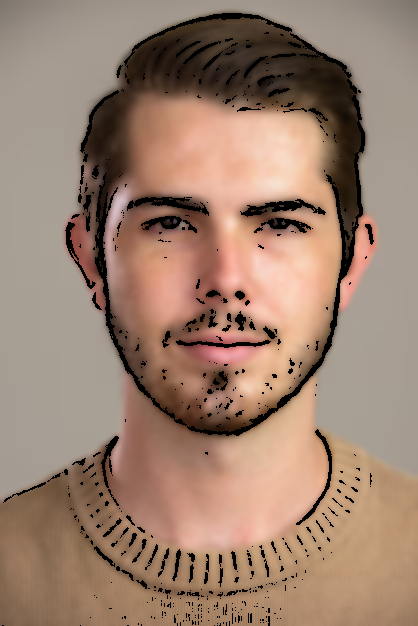

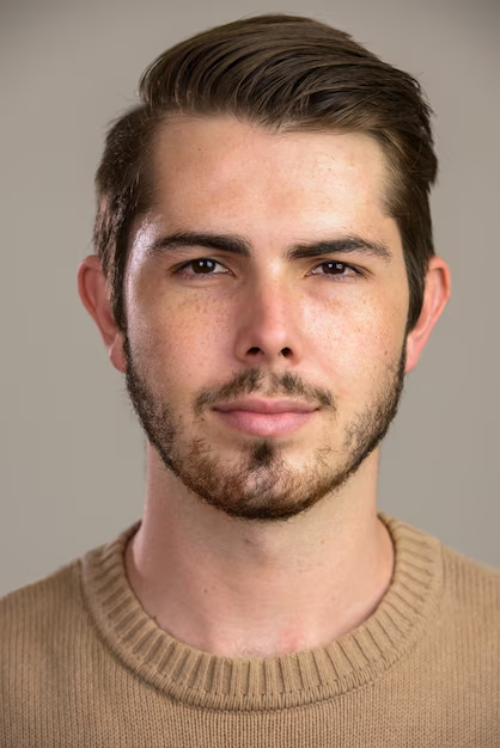

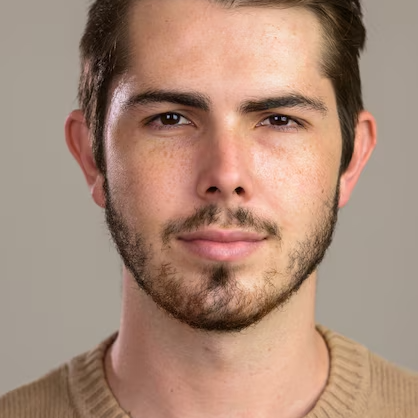

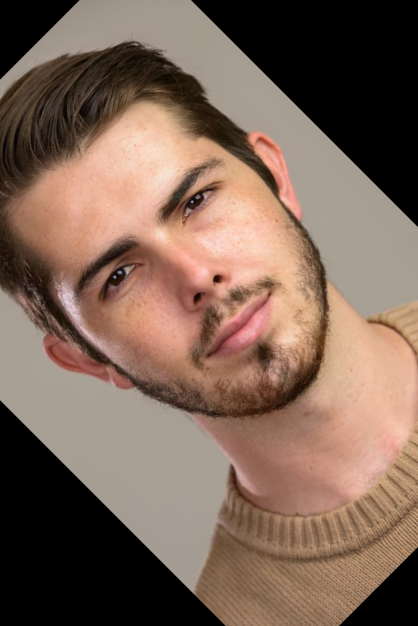

In [ ]:
cv2_imshow(grayscale_img)
cv2_imshow(sepia_img)
cv2_imshow(negative_img)
cv2_imshow(blur_img)
cv2_imshow(edges_img)
cv2_imshow(cartoon_img)
cv2_imshow(resized_img)
cv2_imshow(cropped_img)
cv2_imshow(rotated_img)

# Experiment - 3 - Playing with Image - II

## Image Resolution and Interpolation Studies

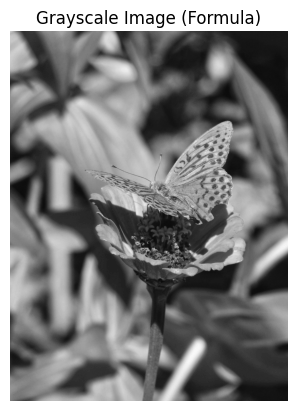

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/image.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

R = image_rgb[:, :, 0]
G = image_rgb[:, :, 1]
B = image_rgb[:, :, 2]

gray_image = 0.299 * R + 0.587 * G + 0.114 * B
gray_image = gray_image.astype(np.uint8)

plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image (Formula)")
plt.axis('off')
plt.show()

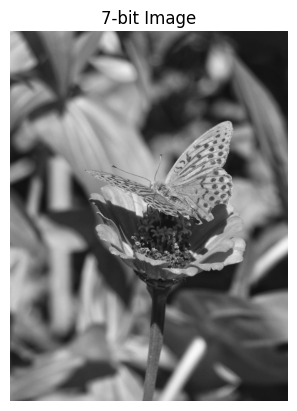

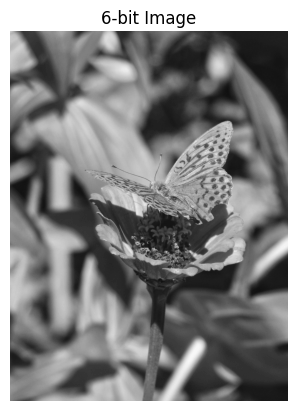

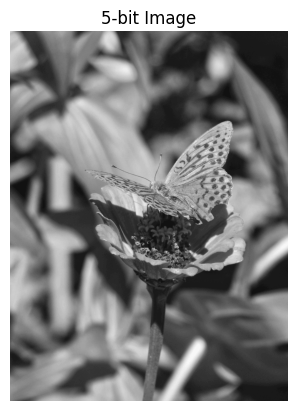

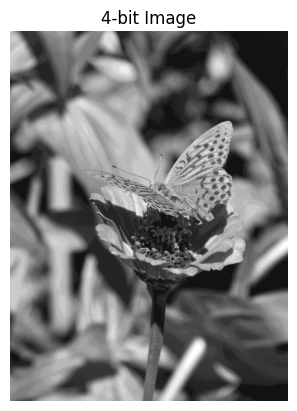

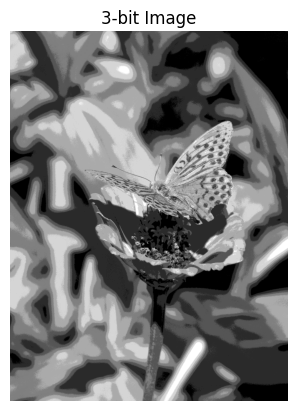

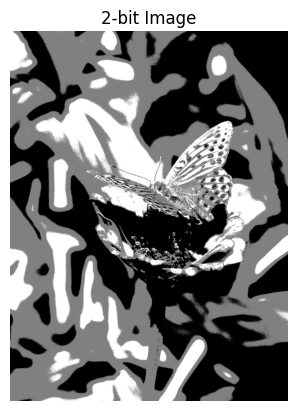

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/image.jpg', cv2.IMREAD_GRAYSCALE)

def reduce_intensity_resolution(image, bits):
    max_intensity = 2**bits - 1
    return np.uint8((image / 256) * max_intensity)

bit_depths = [7, 6, 5, 4, 3, 2]
for bits in bit_depths:
    reduced_image = reduce_intensity_resolution(image, bits)
    plt.imshow(reduced_image, cmap='gray')
    plt.title(f"{bits}-bit Image")
    plt.axis('off')
    plt.show()


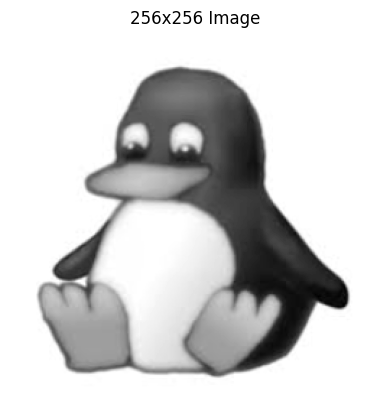

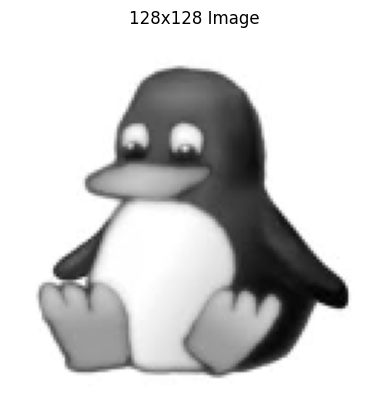

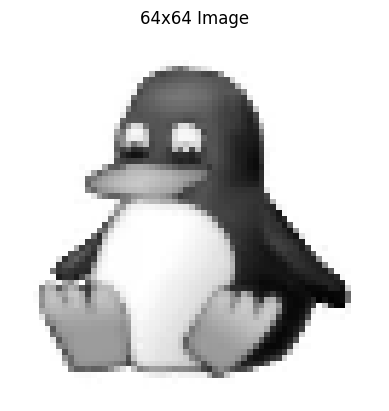

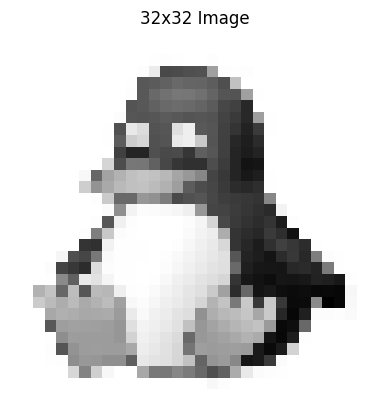

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/penguin.jpg', cv2.IMREAD_GRAYSCALE)

def resize_image(image, size):
    return cv2.resize(image, (size, size), interpolation=cv2.INTER_LINEAR)

sizes = [256, 128, 64, 32]
for size in sizes:
    resized_image = resize_image(image, size)
    plt.imshow(resized_image, cmap='gray')
    plt.title(f"{size}x{size} Image")
    plt.axis('off')
    plt.show()
    cv2.imwrite(f'{size}x{size}_image.jpg', resized_image)


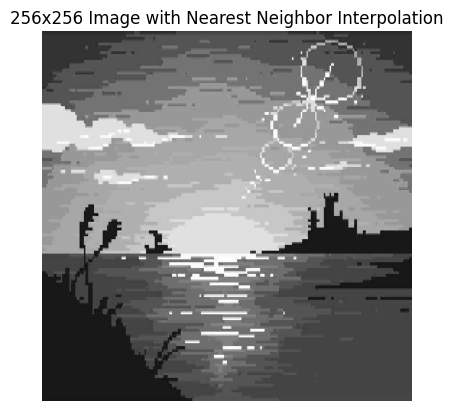

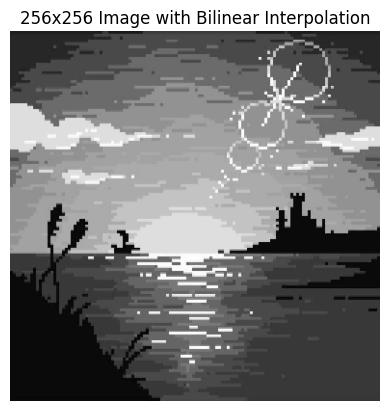

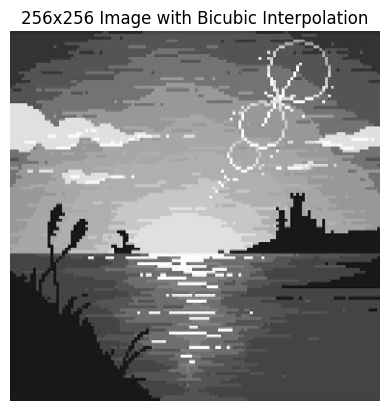

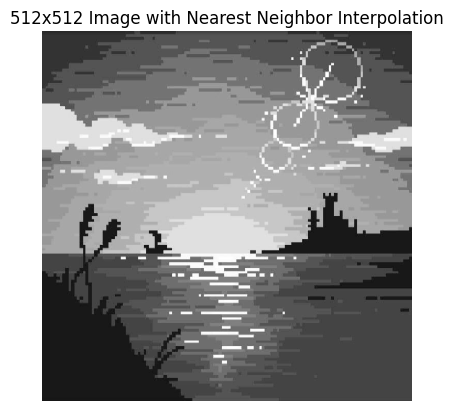

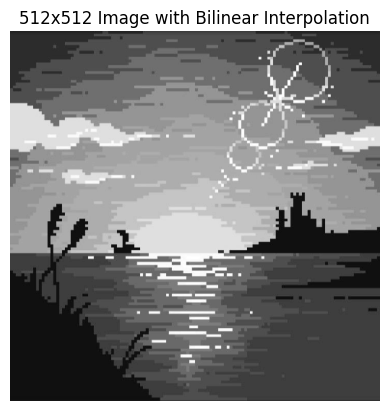

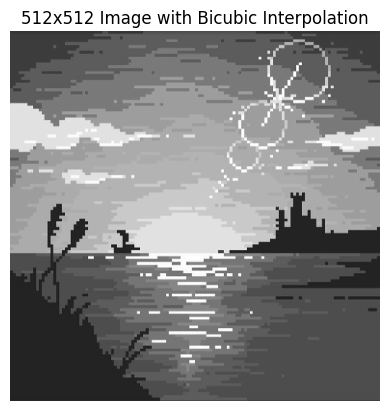

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/sunset.jpg', cv2.IMREAD_GRAYSCALE)

def upscale_image(image, new_size, interpolation_method):
    return cv2.resize(image, (new_size, new_size), interpolation=interpolation_method)
interpolation_methods = {
    'Nearest Neighbor': cv2.INTER_NEAREST,
    'Bilinear': cv2.INTER_LINEAR,
    'Bicubic': cv2.INTER_CUBIC
}

sizes = [256, 512]
for size in sizes:
    for method_name, method in interpolation_methods.items():
        upscaled_image = upscale_image(image, size, method)
        plt.imshow(upscaled_image, cmap='gray')
        plt.title(f"{size}x{size} Image with {method_name} Interpolation")
        plt.axis('off')
        plt.show()
        cv2.imwrite(f'{size}x{size}_{method_name}_interpolation.jpg', upscaled_image)


# Experiment - 4 - Filters and Blurs

## Filtering with a Box Filter with Different Kernel Sizes

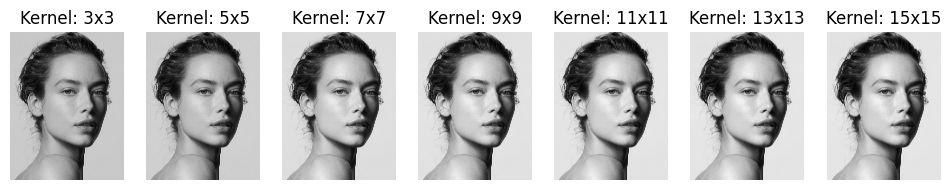

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('sample.jpeg', cv2.IMREAD_GRAYSCALE)


kernel_sizes = [3, 5, 7, 9, 11, 13, 15]
filtered_images = []

for size in kernel_sizes:
    kernel = np.ones((size, size), np.float32) / (size * size)
    filtered = cv2.filter2D(image, -1, kernel)
    filtered_images.append(filtered)

plt.figure(figsize=(12, 6))
for i, filtered in enumerate(filtered_images):
    plt.subplot(1, len(filtered_images), i + 1)
    plt.title(f"Kernel: {kernel_sizes[i]}x{kernel_sizes[i]}")
    plt.imshow(filtered, cmap='gray')
    plt.axis('off')
plt.show()

## Simulate a Defocus Blurred Image

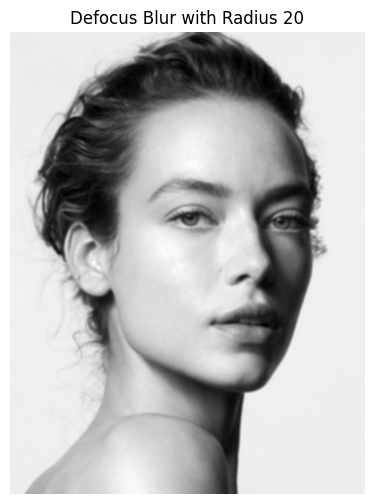

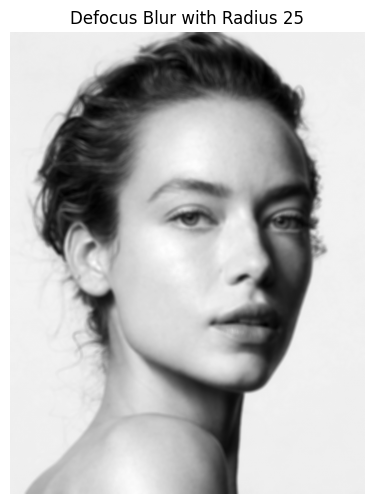

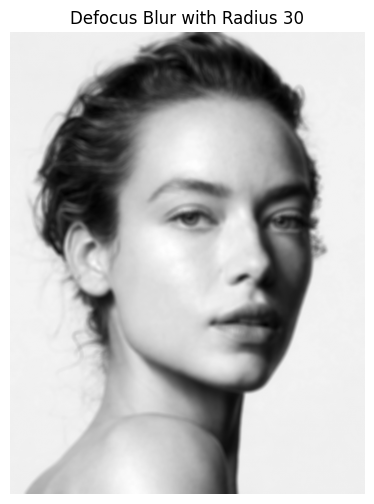

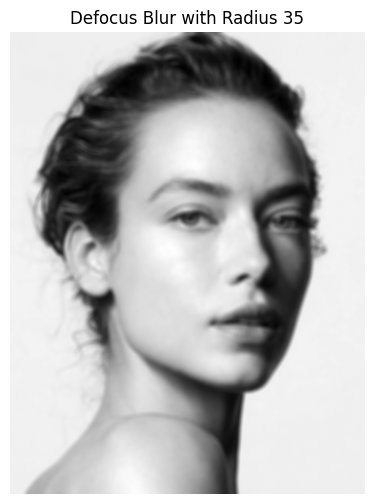

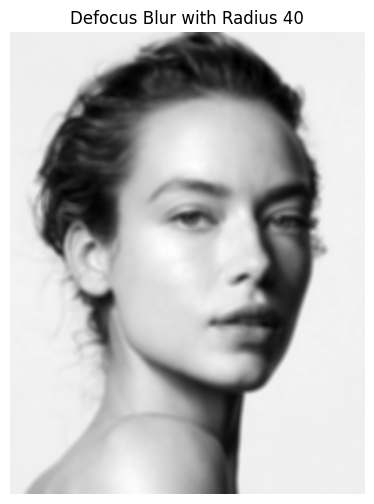

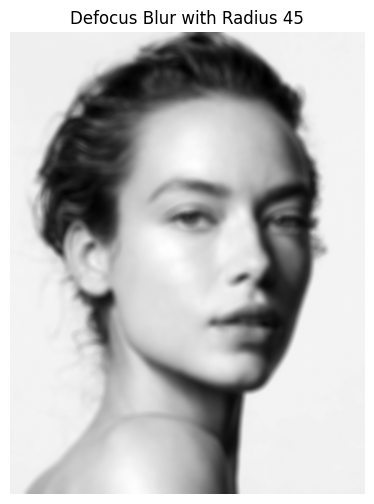

In [ ]:
image = cv2.imread('sample.jpeg', cv2.IMREAD_GRAYSCALE)


def circular_kernel(radius):
    y, x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    kernel = np.zeros_like(mask, dtype=np.float32)
    kernel[mask] = 1
    kernel /= kernel.sum()
    return kernel

radius = [20, 25, 30, 35, 40, 45]

for rad in radius:
  kernel = circular_kernel(rad)
  blurred_image = cv2.filter2D(image, -1, kernel)


  plt.figure(figsize=(6, 6))
  plt.title(f"Defocus Blur with Radius {rad}")
  plt.imshow(blurred_image, cmap='gray')
  plt.axis('off')
  plt.show()


## Motion Blur - Use Your Own Kernel & Blur Image

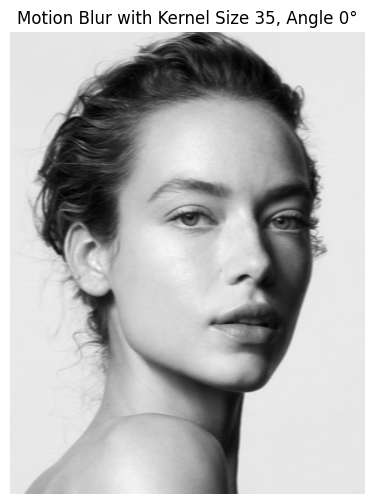

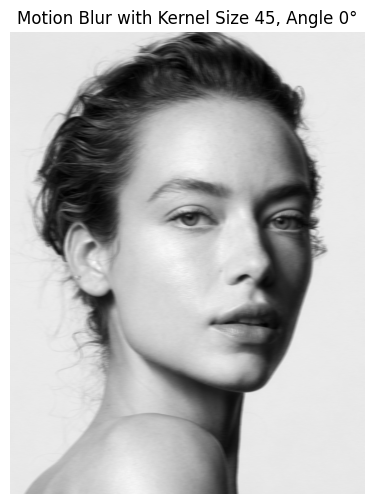

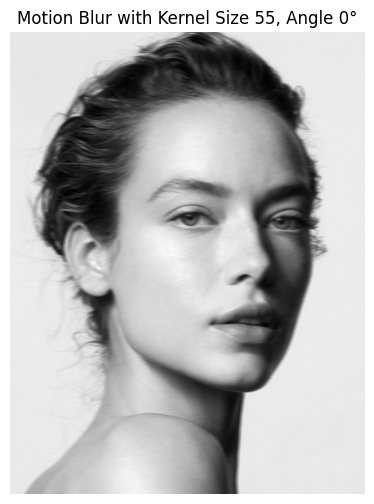

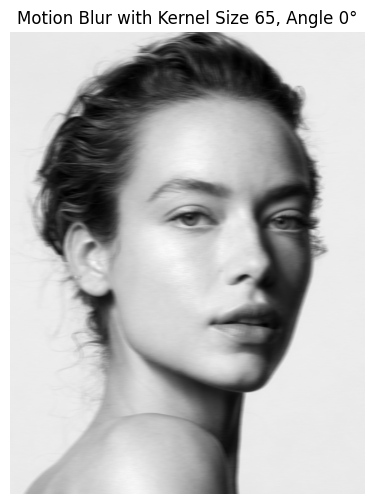

In [ ]:

image = cv2.imread('sample.jpeg', cv2.IMREAD_GRAYSCALE)

def motion_blur_kernel(size, angle):
    kernel = np.zeros((size, size), dtype=np.float32)
    mid = size // 2
    if angle == 0:
        kernel[mid, :] = 1
    elif angle == 90:
        kernel[:, mid] = 1
    elif angle == 45:
        np.fill_diagonal(kernel, 1)
    else:
        raise ValueError("Only angles 0, 90, and 45 are supported")
    kernel /= kernel.sum()
    return kernel

kernel_size = [35, 45, 55, 65]
angle = 0
for ker in kernel_size:
  kernel = motion_blur_kernel(ker, angle)
  motion_blurred_image = cv2.filter2D(image, -1, kernel)

  plt.figure(figsize=(6, 6))
  plt.title(f"Motion Blur with Kernel Size {ker}, Angle {angle}°")
  plt.imshow(motion_blurred_image, cmap='gray')
  plt.axis('off')
  plt.show()


## Correlation vs Convolution

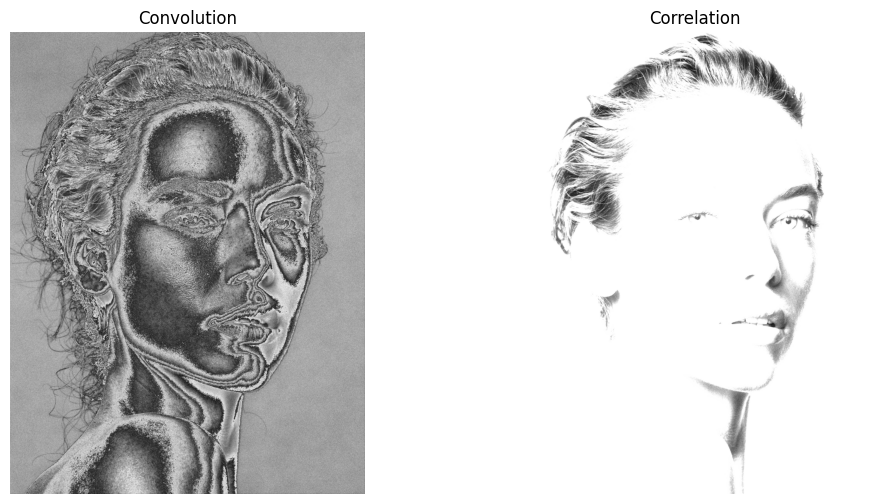

In [ ]:
from scipy import ndimage

image = cv2.imread('sample.jpeg', 0)

kernel = np.array([[1,1,1],[1,1,0],[1,0,0]])

#convolved_image = cv2.filter2D(image, -1, kernel)
convolved_image = ndimage.convolve(image, kernel, mode='constant', cval=1.0)

correlated_image = cv2.filter2D(image, -1, kernel)
#correlated_image = cv2.filter2D(image, -1, np.flip(kernel))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Convolution")
plt.imshow(convolved_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Correlation")
plt.imshow(correlated_image, cmap='gray')
plt.axis('off')
plt.show()


## Separable Filters

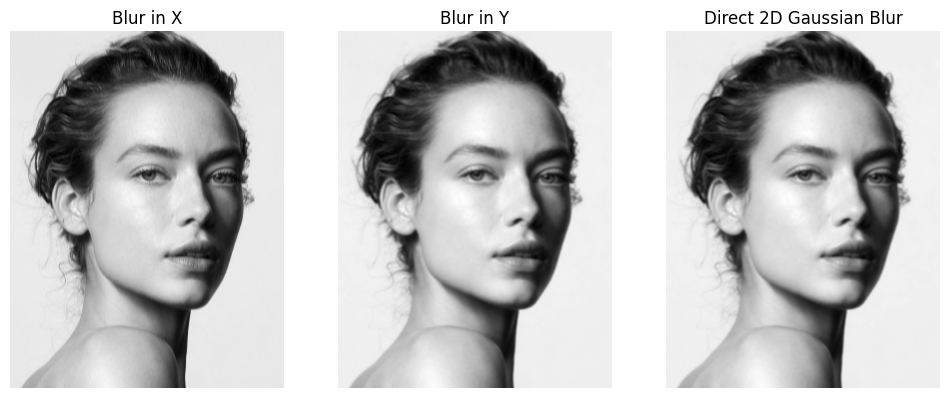

In [ ]:
image = cv2.imread('sample.jpeg', 0)


def gaussian_kernel(size, sigma):
    k = cv2.getGaussianKernel(size, sigma)
    kernel_2d = np.outer(k, k)
    return kernel_2d

size = 55
sigma = 15.0


kernel_2d = gaussian_kernel(size, sigma)
filter_x = cv2.getGaussianKernel(size, sigma)
filter_y = filter_x.T  # Transpose for vertical filtering

blur_x = cv2.filter2D(image, -1, filter_x)
blur_y = cv2.filter2D(blur_x, -1, filter_y)

gaussian_blur = cv2.filter2D(image, -1, kernel_2d)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Blur in X")
plt.imshow(blur_x, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Blur in Y")
plt.imshow(blur_y, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Direct 2D Gaussian Blur")
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')
plt.show()


## Gaussian Distribution with Different Sigma and Mean Value as 0

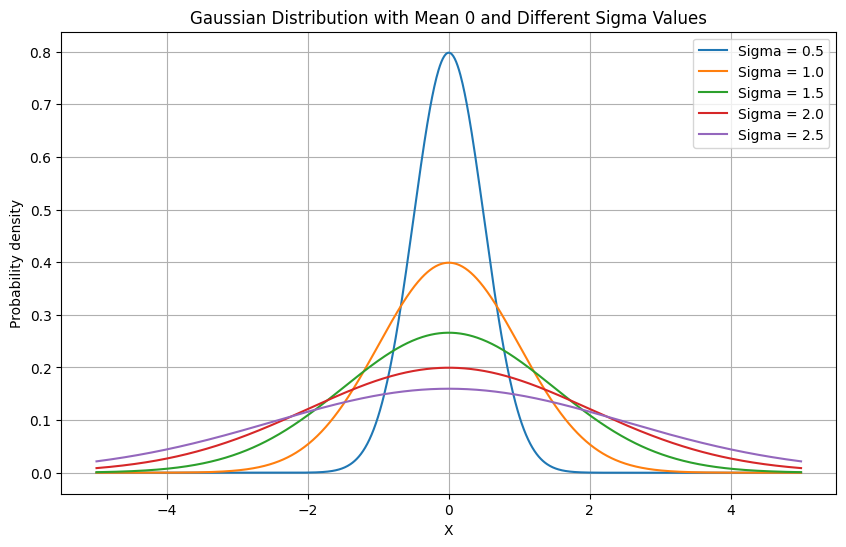

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0  # Mean
sigma_values = [0.5, 1.0, 1.5, 2.0, 2.5,]

x = np.linspace(-5, 5, 1000)

plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    plt.plot(x, y, label=f'Sigma = {sigma}')


plt.title('Gaussian Distribution with Mean 0 and Different Sigma Values')
plt.xlabel('X')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()
